# Test Assignment
This notebook: 

* Opens the file test.fits in Python.
* Crops a 40x40 pixel region around the brightest star in the image.
* Saves the cropped region as test2.fits.
* Uses the code photutils to measure the centroid of this star in the uncropped region

In [1]:
%load_ext autoreload
%autoreload 2;

In [2]:
# import functions 
from astropy.io import fits
from astropy.nddata.utils import Cutout2D

from photutils.centroids import centroid_sources, centroid_com, centroid_1dg, centroid_2dg

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

In [3]:
# open fits file (referenced locally)
file_name = 'test.fits'

hdul = fits.open(file_name)

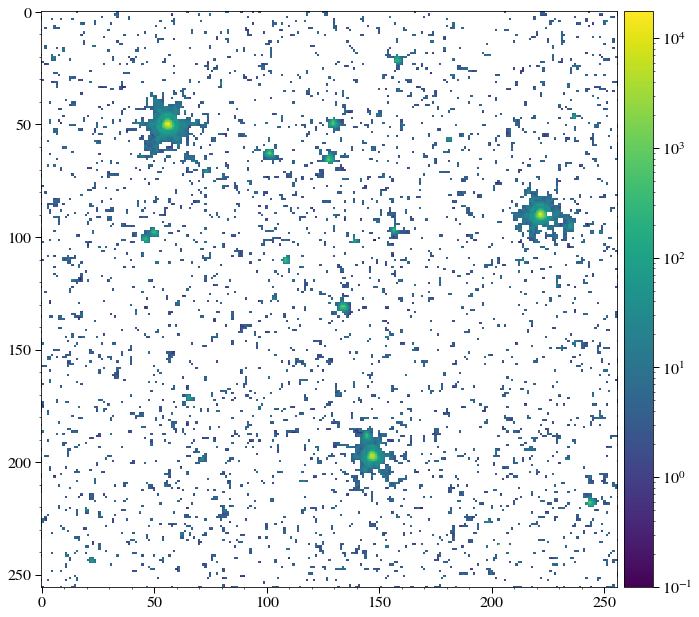

In [5]:
# visualize the data 

# style and size
plt.style.use('jamie')
plt.figure(figsize = (10,10))

# finding the max
data = hdul[0].data
data_max = np.nanmax(data)
data_max_loc = np.where(data == data_max) # I swear I am usually better at variable names 
data_max_y, data_max_x = data_max_loc[0][0], data_max_loc[1][0]

# actual image and axes
ax = plt.gca()
im = plt.imshow(data, norm = mcolors.LogNorm(vmin = 0.1, vmax = data_max))

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax)

plt.tight_layout()

In [6]:
# crop a 40 px by 40 px region around brightest star
cutout = Cutout2D(data, (data_max_x, data_max_y), (40,40))

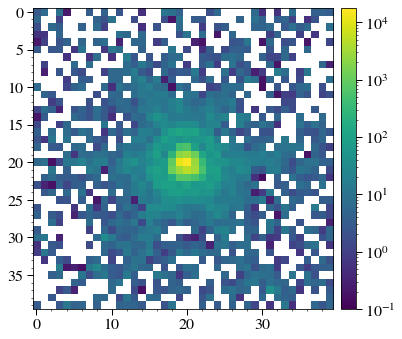

In [7]:
# actual image and axes
ax = plt.gca()
im = plt.imshow(cutout.data, norm = mcolors.LogNorm(vmin = 0.1, vmax = data_max))

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax)

plt.tight_layout()

In [9]:
# save cutout region as new fits file
new_hdul = fits.PrimaryHDU(cutout.data)
new_hdul.writeto('test2.fits', overwrite = True)

In [10]:
# use photutils to measure the centroid of the star
centroid_x, centroid_y = centroid_sources(
    data, data_max_x, data_max_y, box_size = 40, centroid_func = centroid_com
    )

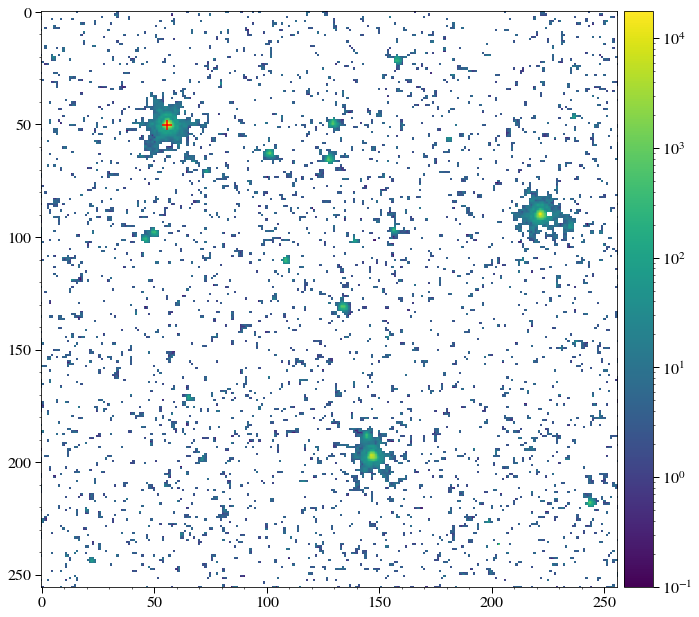

In [11]:
# size
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(data, norm = mcolors.LogNorm(vmin = 0.1, vmax = data_max))

# centroid
plt.scatter(centroid_x[0], centroid_y[0], marker = '+', s = 100, color = 'red')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax)

plt.tight_layout()

In [12]:
# print the location of the centroid
print(f'The centroid of the brightest star calculated as its center of mass is at: ({centroid_x[0]}, {centroid_y[0]})')

The centroid of the brightest star calculated as its center of mass is at: (55.83158993633377, 50.314750253691116)
